In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from itertools import combinations

%matplotlib inline

## images loading

In [4]:
# golden gates photos in Kyiv

In [5]:
images_dir_name = './resources/'

In [12]:
import os, glob

In [35]:
images = []

for f in sorted(glob.glob("./resources/2_*.jpeg")):
    image = Image.open(f)
    image_arr = np.array(image)
    images.append(image_arr)
    


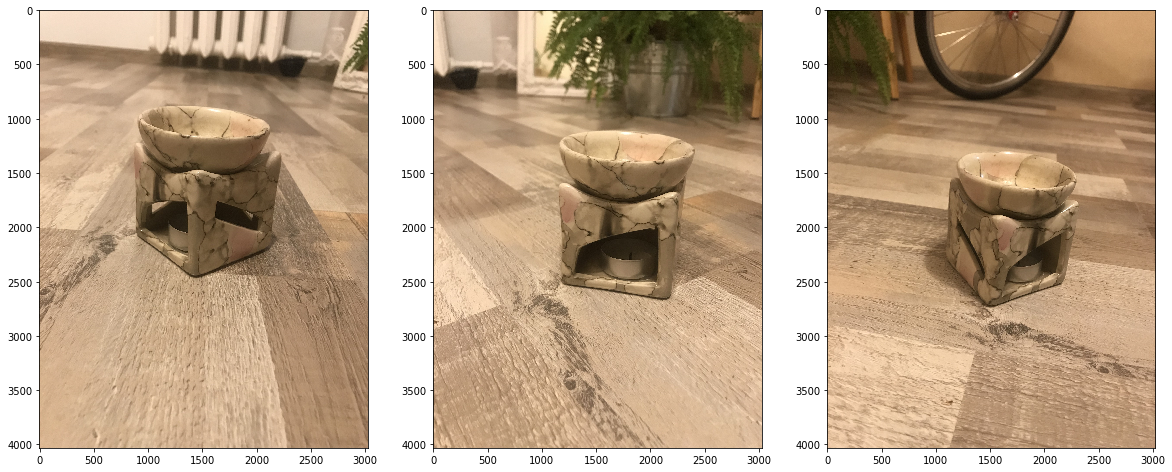

In [36]:
fig=plt.figure(figsize=(20, 15))
columns = 3
for i in range(1, columns +1):
    img = images[i - 1]
    fig.add_subplot(1, columns, i)
    plt.imshow(img)
plt.show()

In [146]:
simmilar_points = np.array([
    [[1463, 1518], [1425, 2415], [897, 1249], [897, 2046], [1106, 1474], [1133, 2228], [1364, 1892], [1067, 1095]],
    [[2233, 1722], [2151, 2635], [1177, 1617], [1188, 2475], [1623, 1777], [1667, 2580], [2090, 2118], [1733, 1414]],
    [[2288, 1788], [2167, 2481], [1590, 1925], [1513, 2690], [1920, 1958], [1876, 2596], [2211, 2107], [2178, 1628]],
])

## draw with points

In [147]:
import seaborn as sns

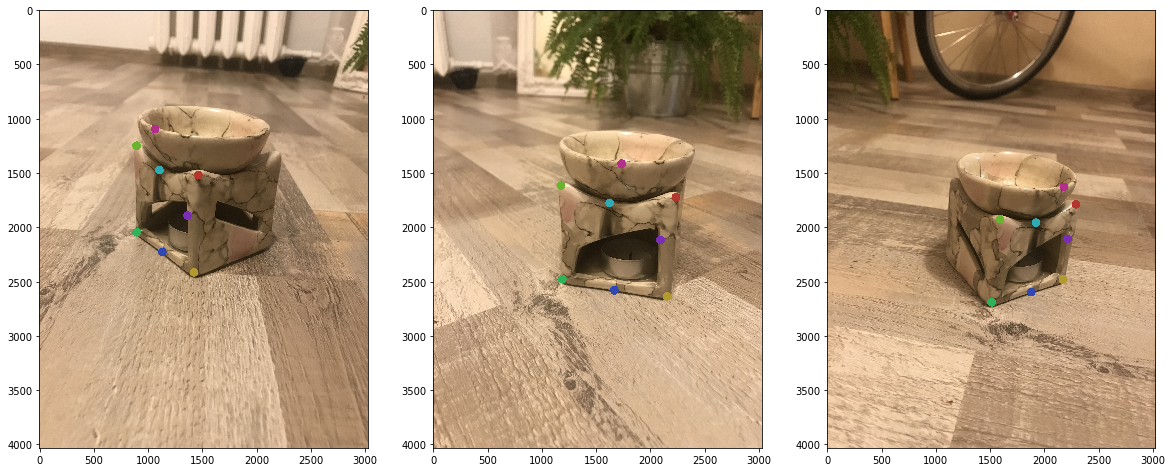

In [148]:
colors = sns.color_palette('hls', 8)
colors = list([tuple((_ * 255. - 40 for _ in el)) for el in colors])

fig = plt.figure(figsize=(20, 15))
for ix, img in enumerate(images):
    image = np.copy(img)
    points = simmilar_points[ix]
    
    for i, (y, x) in enumerate(points):
        cv2.circle(image, (y, x), 40, colors[i], -1)
        
    fig.add_subplot(1, 3, ix + 1)
    plt.imshow(image)
    
plt.show()

In [154]:
def get_fundamental_matrix(points_1, points_2):
    matrix, mask = cv2.findFundamentalMat(points_1, points_2, cv2.FM_8POINT)

    # We select only inlier points
    points_1 = points_1[mask.ravel() == 1]
    
    return matrix

In [155]:
def compute_epilines(points_1, points_2, fundamental_matrix):
    lines_1 = cv2.computeCorrespondEpilines(
        points_2.reshape(-1, 1, 2),
        2,
        fundamental_matrix
    )
    lines_1 = lines_1.reshape(-1, 3)
        
    lines_2 = cv2.computeCorrespondEpilines(
        points_1.reshape(-1, 1, 2),
        2,
        fundamental_matrix
    )
    lines_2 = lines_2.reshape(-1, 3)
        
    return lines_1, lines_2

In [185]:
def draw_lines(image_1, image_2, lines, points_1, points_2):
    img = image_1.copy()
    
    r, c = img.shape[:2]
    
    colors = sns.color_palette('hls', 8)
    colors = list([tuple((_ * 255. - 40 for _ in el)) for el in colors])
    
    for i, (r, points_1, points_2) in enumerate(zip(lines, points_1, points_2)):
        color = colors[i]
        x0, y0 = map(int, [0, -r[2] / r[1] ])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c)/ r[1] ])
        img = cv2.line(img, (x0, y0), (x1, y1), color, 20)
    
    return img

In [186]:
def find_draw_epilines(image_1_ix, image_2_ix):
    img_1 = images[image_1_ix]
    img_2 = images[image_2_ix]
    
    points_1 = simmilar_points[image_1_ix]
    points_2 = simmilar_points[image_2_ix]

    fundamental_matrix = get_fundamental_matrix(points_1, points_2)
    
    lines_1, lines_2 = compute_epilines(points_1, points_2, fundamental_matrix)
    image_res = draw_lines(img_1, img_2, lines_1, points_1, points_2)
    return image_res

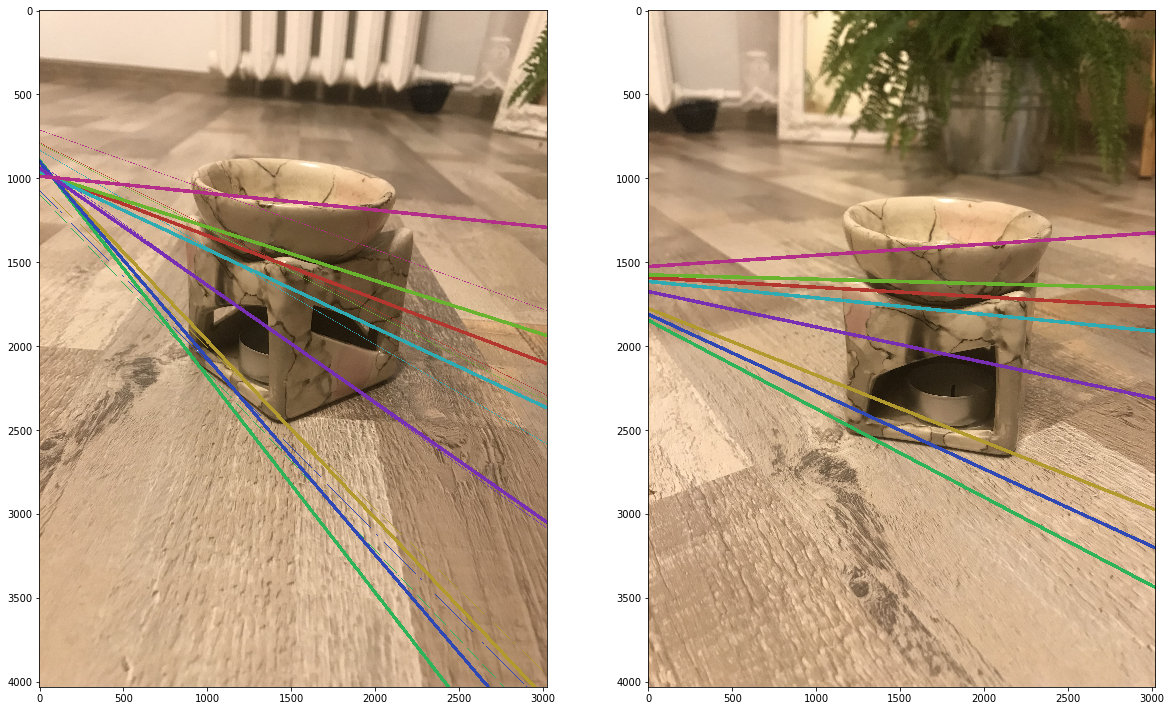

In [187]:
fig = plt.figure(figsize=(20, 15))

comb_img = (0, 1)

image_res_1 = find_draw_epilines(comb_img[0], comb_img[1])
fig.add_subplot(1, 2, 1)
plt.imshow(image_res_1)

image_res_2 = find_draw_epilines(comb_img[1], comb_img[0])
fig.add_subplot(1, 2, 2)
plt.imshow(image_res_2)

plt.show()

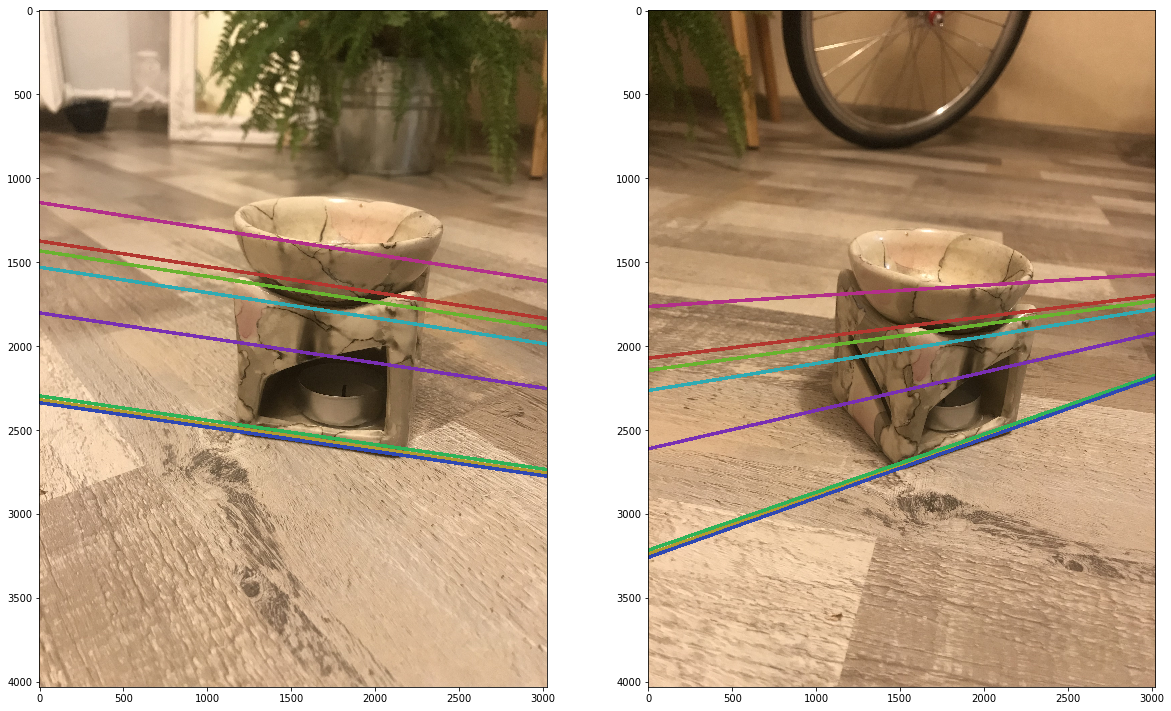

In [188]:
fig = plt.figure(figsize=(20, 15))

comb_img = (1, 2)

image_res_1 = find_draw_epilines(comb_img[0], comb_img[1])
fig.add_subplot(1, 2, 1)
plt.imshow(image_res_1)

image_res_2 = find_draw_epilines(comb_img[1], comb_img[0])
fig.add_subplot(1, 2, 2)
plt.imshow(image_res_2)

plt.show()

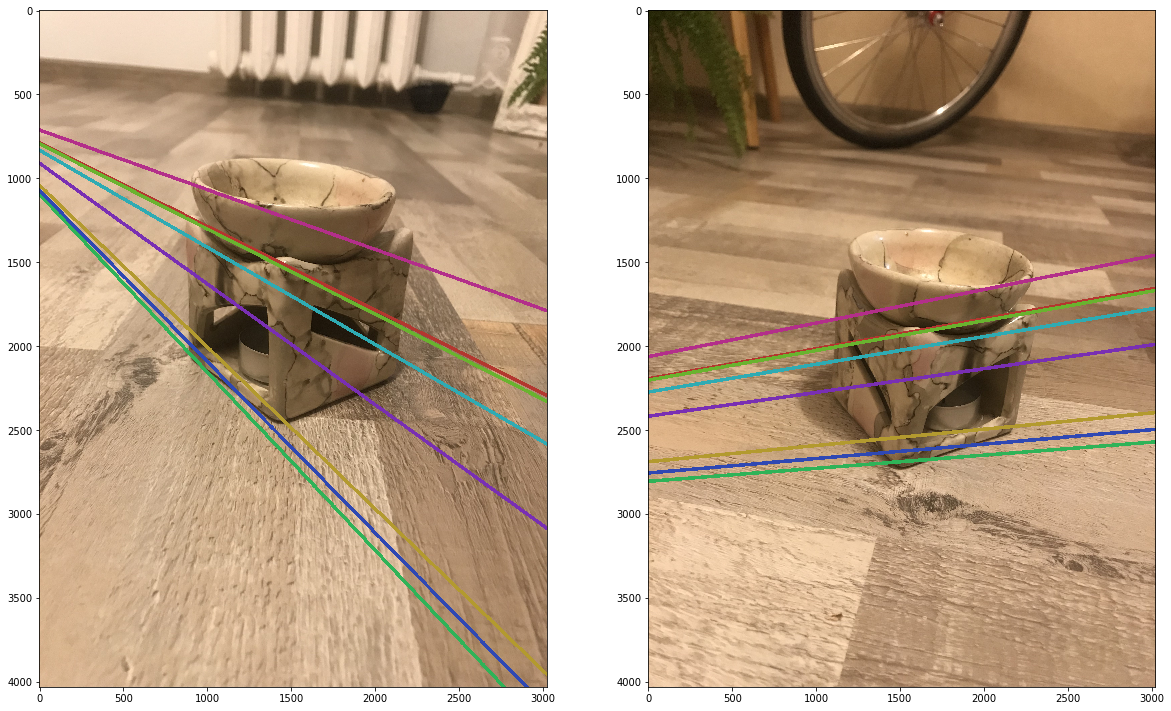

In [189]:
fig = plt.figure(figsize=(20, 15))

comb_img = (0, 2)

image_res_1 = find_draw_epilines(comb_img[0], comb_img[1])
fig.add_subplot(1, 2, 1)
plt.imshow(image_res_1)

image_res_2 = find_draw_epilines(comb_img[1], comb_img[0])
fig.add_subplot(1, 2, 2)
plt.imshow(image_res_2)

plt.show()